In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import logging
logging.basicConfig(level=logging.WARNING, handlers=[logging.StreamHandler()])
logging.debug("phuzzy")
import matplotlib.pyplot as plt
import scipy.io
import os
import numpy as np
import pandas as pd
import xarray as xr
import phuzzy as ph

In [2]:
# -*- coding: utf-8 -*-


number_of_alpha_levels = 31

# load P
P0 = 5000.  # N
dP = 0.1 * P0  # N
P = ph.Triangle(alpha0=[P0 - dP, P0 + dP], alpha1=[P0], name="P ±10%", number_of_alpha_levels=number_of_alpha_levels)

In [3]:
# dimensions L, W, H
W0 = 50  # mm
H0 = 100  # mm
L0 = 2000  # mm

dW = 0.1 * W0  # mm
dH = 0.1 * H0  # mm
dL = 0.1 * L0  # mm

L = ph.Triangle(alpha0=[L0 - dL, L0 + dL], alpha1=[L0], name="L ±10%", number_of_alpha_levels=number_of_alpha_levels)
W = ph.Triangle(alpha0=[W0 - dW, W0 + dW], alpha1=[W0], name="W ±10%", number_of_alpha_levels=number_of_alpha_levels)
H = ph.Triangle(alpha0=[H0 - dH, H0 + dH], alpha1=[H0], name="H ±10%", number_of_alpha_levels=number_of_alpha_levels)

In [4]:
# material

E0 = 30000.  # N/mm2
dE = 0.1 * E0  # N/mm2
E = ph.TruncNorm(alpha0=[E0 - dE, E0 + dE], alpha1=[E0], name="E ±10%", number_of_alpha_levels=number_of_alpha_levels)

I0 = W0 * H0 ** 3 / 12.
w0 = P0 * L0 ** 3 / (48 * E0 * I0)

print("I0 = {:.4g} mm^4".format(I0))
# I0 = 4.167e+06 mm^4
print("w0 = {:.4g} mm".format(w0))
# w0 = 6.667 mm

I = W * H** 3 / 12.
I.name = "I"
w = P * L ** 3 / (48 * E * I)
w.name = r"P L^3 / (48 EI)"

print("I = {} mm^4".format(I))
# I = FuzzyNumber(W*H^3/12.0:[[4002483.375, 4335850.041666667], [4166666.6666666665, 4166666.6666666665]]) mm^4

print("w = {} mm".format(w))
# w = FuzzyNumber(P*L^3/E*48*W*H^3/12.0:[[5.594629603627992, 8.024370049019725], [6.666666666666667, 6.666666666666667]]) mm

I0 = 4.167e+06 mm^4
w0 = 6.667 mm
I = FuzzyNumber(I:[[2.73e+06,6.1e+06], [4.17e+06,4.17e+06]]) mm^4
w = FuzzyNumber(P L^3 / (48 EI):[[2.72,16.5], [6.67,6.67]]) mm


In [5]:
C = ph.TruncNorm(alpha0=[E0 - dE, E0 + dE], alpha1=[E0], name="color", number_of_alpha_levels=number_of_alpha_levels)
C

TruncNorm(color:[[2.7e+04,3.3e+04], [3e+04,3e+04]])

In [6]:
w_mean = w.mean()
dw_l = w_mean - w.min()
dw_r = w.max() - w_mean
print("w = {:.4g} mm (- {:.4g}|+ {:.4g})".format(w_mean, dw_l, dw_r))
# w = 6.703 mm (- 1.109|+ 1.321)
print("w = {:.4g} mm [{:.4g},{:.4g}]".format(w_mean, w.min(), w.max()))
# w = 6.703 mm [5.595,8.024]

from phuzzy.mpl import mix_mpl
import matplotlib.pyplot as plt

mix_mpl(I)
mix_mpl(w)

w = 7.647 mm (- 4.931|+ 8.882)
w = 7.647 mm [2.716,16.53]


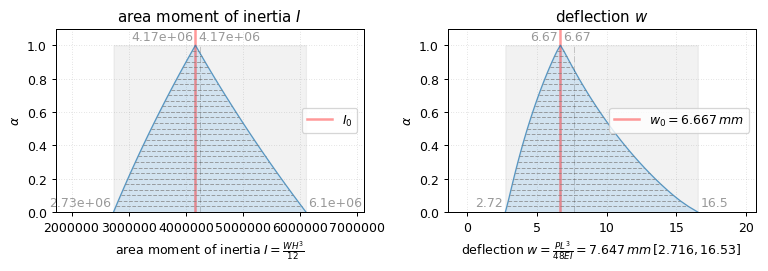

In [7]:
H_ = 80. # mm
B_ = 220. # mm

fig, axs = plt.subplots(1, 2, dpi=90, facecolor='w', edgecolor='k', figsize=(B_ / 25.4, H_ / 25.4))

axs[0].axvline(I0, lw=2, alpha=.4, c="r", label="$I_0$")
axs[1].axvline(w0, lw=2, alpha=.4, c="r", label="$w_0 = {:.4g}\,mm$".format(w0))
I.plot(ax=axs[0])
w.plot(ax=axs[1])

axs[0].set_title("area moment of inertia $I$")
axs[1].set_title("deflection $w$")

axs[0].set_xlabel(r"area moment of inertia $I=\frac{WH^3}{12}$")
axs[1].set_xlabel(r"deflection $w=\frac{PL^3}{48EI}$" + "$ = {:.4g}\,mm\,[{:.4g},{:.4g}]$".format(w_mean, w.min(), w.max()))

axs[0].legend(loc="center right")
axs[1].legend(loc="center right")
fig.tight_layout(pad=1.18, h_pad=1.1)
fig.savefig("/tmp/ssb.png")

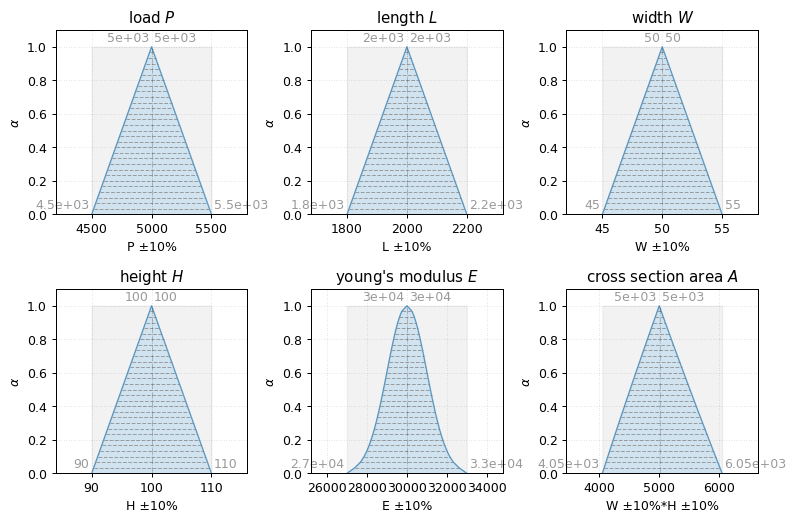

In [8]:
H_ = 150.  # mm
B_ = 220.  # mm

fig, axs = plt.subplots(2, 3, dpi=90, facecolor='w', edgecolor='k', figsize=(B_ / 25.4, H_ / 25.4))

A = W * H

ys = [P, L,
      W, H,
      E, A]

P.title = r"load $P$"
L.title = r"length $L$"
W.title = r"width $W$"
H.title = r"height $H$"
E.title = r"young's modulus $E$"
A.title = r"cross section area $A$"

for i, y in enumerate(ys):
    mix_mpl(y)
    ax = axs.ravel()[i]
    y.plot(ax=ax)
    if hasattr(y, "title"):
        ax.set_title(y.title)

fig.tight_layout()
fig.savefig("/tmp/ssb_parameter.png")

# plt.show()

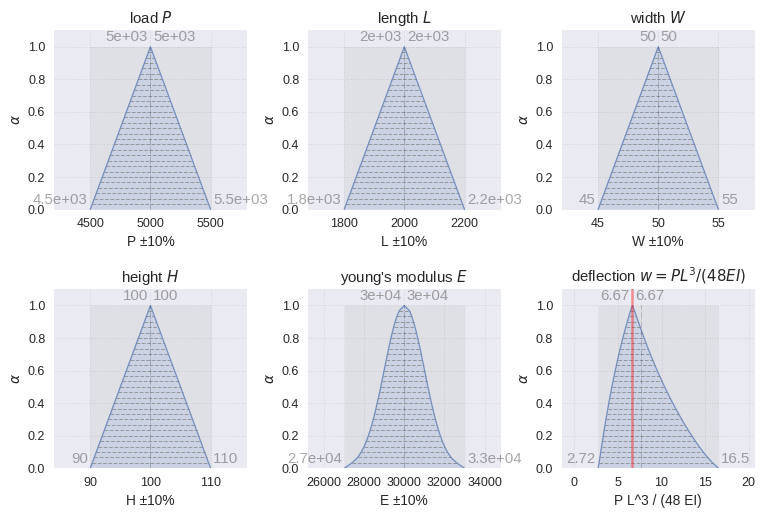

In [23]:
H_ = 150.  # mm
B_ = 220.  # mm

fig, axs = plt.subplots(2, 3, dpi=90, facecolor='w', edgecolor='k', figsize=(B_ / 25.4, H_ / 25.4))

A = W * H

ys = [P, L,
      W, H,
      E, w]

P.title = r"load $P$"
L.title = r"length $L$"
W.title = r"width $W$"
H.title = r"height $H$"
E.title = r"young's modulus $E$"
w.title = r"deflection $w=P L^3 / (48 EI)$"

for i, y in enumerate(ys):
    mix_mpl(y)
    ax = axs.ravel()[i]
    y.plot(ax=ax)
    if hasattr(y, "title"):
        ax.set_title(y.title)
axs.ravel()[-1].axvline(w0, lw=2, alpha=.4, c="r", label="$w_0 = {:.4g}\,mm$".format(w0))
fig.tight_layout()
fig.savefig("/tmp/ssb_parameter_results.png")

# plt.show()

In [9]:
import phuzzy.analysis
def calc_w(X):
    P = X[0]
    L = X[1]
    W = X[2]
    H = X[3]
    E = X[4]
    A = W * H
    A.name = "A"
    
    I = W * H** 3 / 12.
    I.name = "I"
    w = P * L ** 3 / (48 * E * I)
    w.name = r"P L^3 / (48 EI)"
    return w

pa = phuzzy.analysis.FuzzyAnalysis(designvars=[P, L, W, H, E, C], function=calc_w)
print(pa)

sensitivities = pa.lcefa()
sensitivities

(FuzzyAnalysis:'FuzzyAnalysis N.N.', dv=[Triangle(P ±10%:[[4.5e+03,5.5e+03], [5e+03,5e+03]]), Triangle(L ±10%:[[1.8e+03,2.2e+03], [2e+03,2e+03]]), Triangle(W ±10%:[[45,55], [50,50]]), Triangle(H ±10%:[[90,110], [100,100]]), TruncNorm(E ±10%:[[2.7e+04,3.3e+04], [3e+04,3e+04]]), TruncNorm(color:[[2.7e+04,3.3e+04], [3e+04,3e+04]])]
P ±10%.sk=0.11
L ±10%.sk=0.31
W ±10%.sk=0.12
H ±10%.sk=0.33
E ±10%.sk=0.14
color.sk=0


,x,name,sk
0,"Triangle(P ±10%:[[2.72,16.5], [3.02,15]])",P ±10%,0.106713
1,"FuzzyNumber(L ±10%:[[2.72,16.5], [3.73,12.4]])",L ±10%,0.308237
2,"Triangle(W ±10%:[[2.72,16.5], [2.99,14.9]])",W ±10%,0.116639
3,"FuzzyNumber(H ±10%:[[2.72,16.5], [3.61,12.1]])",H ±10%,0.332769
4,"FuzzyNumber(E ±10%:[[2.72,16.5], [2.99,14.9]])",E ±10%,0.135642
5,"Uniform(color:[[2.72,16.5], [2.72,16.5]])",color,0.000000


In [10]:
sensitivities = sensitivities.sort_values(by="sk", ascending=False)

/home/ingolf.lepenies/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


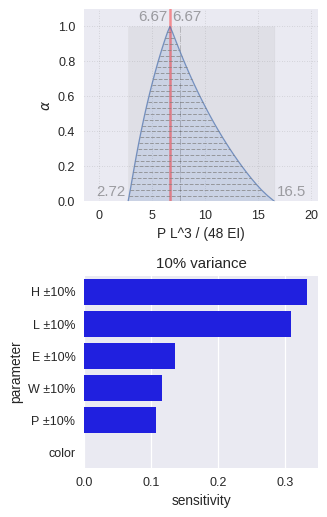

In [17]:
import seaborn as sns
fig, axs = plt.subplots(2,1, figsize=(100/25.4,150/25.4), dpi=90, facecolor='w', edgecolor='k')
ax = axs[1]
ax = sns.barplot(x="sk", y="name", data=sensitivities,
            label="name", color="b", ax=ax)
ax.set_xlabel("sensitivity")
ax.set_ylabel("parameter")
ax.set_title("10% variance")
# fig = plt.gcf()
axw = ax=axs[0]
axw.axvline(w0, lw=2, alpha=.4, c="r", label="$w_0 = {:.4g}\,mm$".format(w0))

w.plot(ax=axw)
fig.tight_layout()
fig.savefig("/tmp/sst_sensitivities_10.png")

In [12]:
E0 = 30000.  # N/mm2
dE = 0.01 * E0  # N/mm2
E01 = ph.TruncNorm(alpha0=[E0 - dE, E0 + dE], alpha1=[E0], name="E ±1%", number_of_alpha_levels=number_of_alpha_levels)
I = W * H** 3 / 12.
I.name = "I"
w_E01 = P * L ** 3 / (48 * E01 * I)
w_E01.name = r"P L^3 / (48 EI)"
mix_mpl(w_E01)
pa = phuzzy.analysis.FuzzyAnalysis(designvars=[P, L, W, H, E01, C], function=calc_w)
print(pa)

sensitivities_E01 = pa.lcefa()
sensitivities_E01 = sensitivities_E01.sort_values(by="sk", ascending=False)
sensitivities_E01

(FuzzyAnalysis:'FuzzyAnalysis N.N.', dv=[Triangle(P ±10%:[[4.5e+03,5.5e+03], [5e+03,5e+03]]), Triangle(L ±10%:[[1.8e+03,2.2e+03], [2e+03,2e+03]]), Triangle(W ±10%:[[45,55], [50,50]]), Triangle(H ±10%:[[90,110], [100,100]]), TruncNorm(E ±1%:[[2.97e+04,3.03e+04], [3e+04,3e+04]]), TruncNorm(color:[[2.7e+04,3.3e+04], [3e+04,3e+04]])]
P ±10%.sk=0.12
L ±10%.sk=0.35
W ±10%.sk=0.13
H ±10%.sk=0.38
E ±1%.sk=0.015
color.sk=0


,x,name,sk
3,"FuzzyNumber(H ±10%:[[2.96,15], [3.94,11]])",H ±10%,0.378238
1,"FuzzyNumber(L ±10%:[[2.96,15], [4.06,11.3]])",L ±10%,0.352859
2,"Triangle(W ±10%:[[2.96,15], [3.25,13.5]])",W ±10%,0.132156
0,"Triangle(P ±10%:[[2.96,15], [3.29,13.7]])",P ±10%,0.121697
4,"FuzzyNumber(E ±1%:[[2.96,15], [2.99,14.9]])",E ±1%,0.015050
5,"Uniform(color:[[2.96,15], [2.96,15]])",color,0.000000


/home/ingolf.lepenies/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


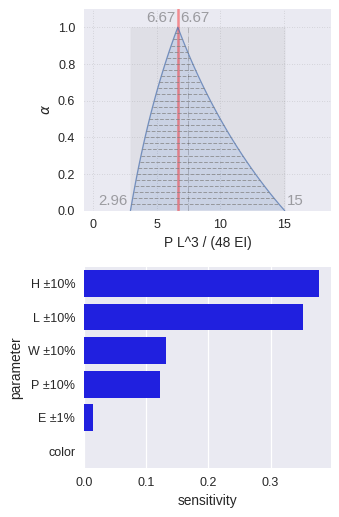

In [18]:
import seaborn as sns
fig, axs = plt.subplots(2,1, figsize=(100/25.4,150/25.4), dpi=90, facecolor='w', edgecolor='k')
ax = axs[1]
ax = sns.barplot(x="sk", y="name", data=sensitivities_E01,
            label="name", color="b", ax=ax)
ax.set_xlabel("sensitivity")
ax.set_ylabel("parameter")
# ax.set_title("5% variance E")
# fig = plt.gcf()
axw = ax=axs[0]
axw.axvline(w0, lw=2, alpha=.4, c="r", label="$w_0 = {:.4g}\,mm$".format(w0))
w_E01.plot(ax=axw)
fig.tight_layout()
fig.savefig("/tmp/sst_sensitivities_10_E01.png")

In [14]:
dL = 0.01 * L0  # mm
L01 = ph.Triangle(alpha0=[L0 - dL, L0 + dL], alpha1=[L0], name="L ±1%", number_of_alpha_levels=number_of_alpha_levels)
I = W * H** 3 / 12.
I.name = "I"
w_L01 = P * L01 ** 3 / (48 * E * I)
w_L01.name = r"P L^3 / (48 EI)"
mix_mpl(w_L01)
pa = phuzzy.analysis.FuzzyAnalysis(designvars=[P, L01, W, H, E, C], function=calc_w)
print(pa)

sensitivities_L01 = pa.lcefa()
sensitivities_L01 = sensitivities_L01.sort_values(by="sk", ascending=False)
sensitivities_L01

(FuzzyAnalysis:'FuzzyAnalysis N.N.', dv=[Triangle(P ±10%:[[4.5e+03,5.5e+03], [5e+03,5e+03]]), Triangle(L ±1%:[[1.98e+03,2.02e+03], [2e+03,2e+03]]), Triangle(W ±10%:[[45,55], [50,50]]), Triangle(H ±10%:[[90,110], [100,100]]), TruncNorm(E ±10%:[[2.7e+04,3.3e+04], [3e+04,3e+04]]), TruncNorm(color:[[2.7e+04,3.3e+04], [3e+04,3e+04]])]
P ±10%.sk=0.15
L ±1%.sk=0.046
W ±10%.sk=0.16
H ±10%.sk=0.46
E ±10%.sk=0.19
color.sk=0


,x,name,sk
3,"FuzzyNumber(H ±10%:[[3.61,12.8], [4.81,9.33]])",H ±10%,0.459697
4,"FuzzyNumber(E ±10%:[[3.61,12.8], [3.98,11.5]])",E ±10%,0.185360
2,"Triangle(W ±10%:[[3.61,12.8], [3.98,11.5]])",W ±10%,0.159404
0,"Triangle(P ±10%:[[3.61,12.8], [4.02,11.6]])",P ±10%,0.149070
1,"FuzzyNumber(L ±1%:[[3.61,12.8], [3.73,12.4]])",L ±1%,0.046469
5,"Uniform(color:[[3.61,12.8], [3.61,12.8]])",color,0.000000


/home/ingolf.lepenies/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


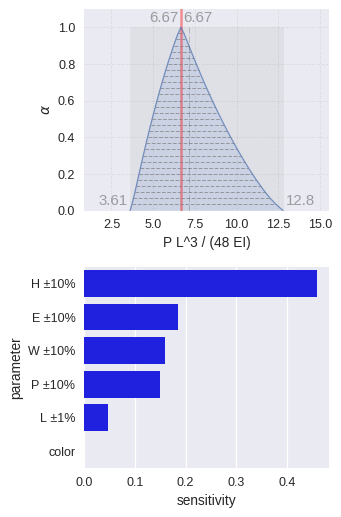

In [19]:
import seaborn as sns
fig, axs = plt.subplots(2,1, figsize=(100/25.4,150/25.4), dpi=90, facecolor='w', edgecolor='k')
ax = axs[1]
ax = sns.barplot(x="sk", y="name", data=sensitivities_L01,
            label="name", color="b", ax=ax)
ax.set_xlabel("sensitivity")
ax.set_ylabel("parameter")
# ax.set_title("5% variance E")
# fig = plt.gcf()
axw = ax=axs[0]
axw.axvline(w0, lw=2, alpha=.4, c="r", label="$w_0 = {:.4g}\,mm$".format(w0))

w_L01.plot(ax=axw)
fig.tight_layout()
fig.savefig("/tmp/sst_sensitivities_10_L01.png")